# Pytorch ResNet50 구현하기
## 6가지 동물 분류하기

### 1. 이미지 넘버링 (파일 이름 변경)

In [1]:
import os
import glob

In [2]:
import os
import glob

path = 'C:/AI/animal/'
Bear = glob.glob(path + '/Bear' + '/*')
Cat = glob.glob(path + '/Cat' + '/*')
Dog = glob.glob(path + '/Dog' + '/*')
Hog = glob.glob(path + '/Hog' + '/*')
Panda = glob.glob(path + '/Panda' + '/*')
Tiger = glob.glob(path + '/Tiger' + '/*')

def rename(files):
    
    if 'Bear' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+'/Bear', 'bear_' + '{0:03d}.jpg'.format(i)))
        print('Bear {}번째 이미지까지 성공'.format(i+1))
    elif 'Cat' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+'/Cat', 'cat_' + '{0:03d}.jpg'.format(i)))
        print('Cat {}번째 이미지까지 성공'.format(i+1))
    elif 'Dog' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+'/Dog', 'dog_' + '{0:03d}.jpg'.format(i)))
        print('Dog {}번째 이미지까지 성공'.format(i+1))
    elif 'Hog' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+'/Hog', 'hog_' + '{0:03d}.jpg'.format(i)))
        print('Hog {}번째 이미지까지 성공'.format(i+1))
    elif 'Panda' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+'/Panda', 'panda_' + '{0:03d}.jpg'.format(i)))
        print('Panda {}번째 이미지까지 성공'.format(i+1))
    elif 'Tiger' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+'/Tiger', 'tiger_' + '{0:03d}.jpg'.format(i)))
        print('Tiger {}번째 이미지까지 성공'.format(i+1))

In [3]:
rename(Bear)
rename(Cat)
rename(Dog)
rename(Hog)
rename(Panda)
rename(Tiger)

Bear 250번째 이미지까지 성공
Cat 231번째 이미지까지 성공
Dog 252번째 이미지까지 성공
Hog 150번째 이미지까지 성공
Panda 249번째 이미지까지 성공
Tiger 250번째 이미지까지 성공


### 2. 이미지 시각화하기

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
%matplotlib inline

In [5]:
# cv2를 이용해 이미지를 읽는 함수 정의
def read_img(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)   # BGR -> RGB

In [24]:
# 각 이미지 폴더에서 3개씩 랜덤으로 이미지 시각화

# 이미지 array 준비
import random
img_arrs = []
img_num = range(0,150)

for i in random.sample(img_num, 3):
    img_arrs.append(read_img(Bear[i]))
    img_arrs.append(read_img(Cat[i]))
    img_arrs.append(read_img(Dog[i]))
    img_arrs.append(read_img(Hog[i]))
    img_arrs.append(read_img(Panda[i]))
    img_arrs.append(read_img(Tiger[i]))

print('총 {}개의 이미지'.format(len(img_arrs)))

총 18개의 이미지


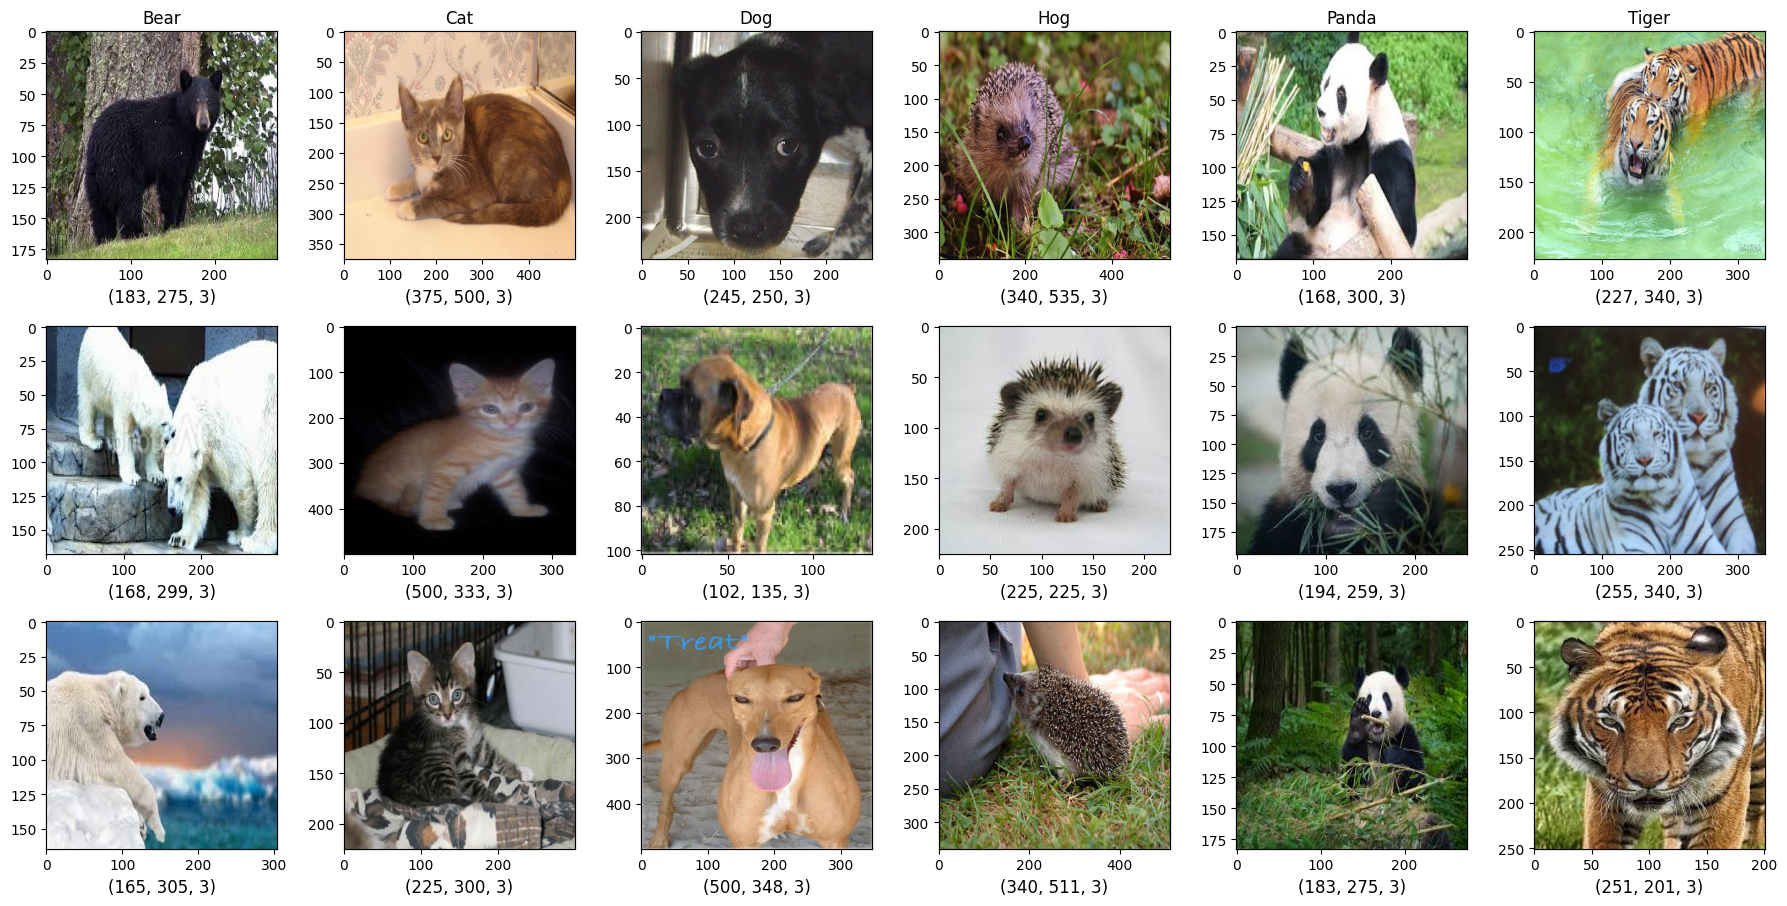

In [25]:
rows = 3
columns = 6

# 그림판 설정
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*3, rows*3))

# 각 판에 이미지 출력
for num in range(1, rows*columns+1):    # 1번부터 18번까지
    
    fig.add_subplot(rows, columns, num)  # 원하는 위치
    idx = num - 1
    
    plt.imshow(img_arrs[idx], aspect='auto')
    plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout()                       # 이미지 사이 간격 조정

# 제목 설정
cols = ['Bear','Cat','Dog','Hog','Panda','Tiger']

for folder_idx, ax in enumerate(axes[0]):
    ax.set_title(cols[folder_idx])

# xtick, ytick 제거
for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])

### 3. 이미지 랜덤 추출 (train, test)

In [31]:
path = 'C:/AI/animal/'
Bear = sorted(glob.glob(path + '/Bear' + '/*'))
Cat = sorted(glob.glob(path + '/Cat' + '/*'))
Dog = sorted(glob.glob(path + '/Dog' + '/*'))
Hog = sorted(glob.glob(path + '/Hog' + '/*'))
Panda = sorted(glob.glob(path + '/Panda' + '/*'))
Tiger = sorted(glob.glob(path + '/Tiger' + '/*'))

In [32]:
import shutil
def split(img_list, test_count, train_path, test_path):
    
    test_files=[]
    for i in random.sample(img_list, test_count):
        test_files.append(i)
    
    # 차집합으로 train, test 리스트 생성하기
    train_files = [x for x in img_list if x not in test_files]
    
    for k in train_files:
        shutil.copy(k, train_path)
        
    for c in test_files:
        shutil.copy(c, test_path)

In [37]:
bear_train_path = path + 'train/bear'
bear_test_path = path + 'test/bear'

cat_train_path = path + 'train/cat'
cat_test_path = path + 'test/cat'

dog_train_path = path + 'train/dog'
dog_test_path = path + 'test/dog'

hog_train_path = path + 'train/hog'
hog_test_path = path + 'test/hog'

panda_train_path = path + 'train/panda'
panda_test_path = path + 'test/panda'

tiger_train_path = path + 'train/tiger'
tiger_test_path = path + 'test/tiger'

split(Bear, round(len(Bear)*0.2), bear_train_path, bear_test_path)
split(Cat, round(len(Cat)*0.2), cat_train_path, cat_test_path)
split(Dog, round(len(Dog)*0.2), dog_train_path, dog_test_path)
split(Hog, round(len(Hog)*0.2), hog_train_path, hog_test_path)
split(Panda, round(len(Panda)*0.2), panda_train_path, panda_test_path)
split(Bear, round(len(Bear)*0.2), tiger_train_path, tiger_test_path)

### 4. train/test 넘버링

In [51]:
path = 'C:/AI/animal/train'
bear_train = glob.glob(path + '/Bear' + '/*')
cat_train = glob.glob(path + '/Cat' + '/*')
dog_train = glob.glob(path + '/Dog' + '/*')
hog_train = glob.glob(path + '/Hog' + '/*')
panda_train = glob.glob(path + '/Panda' + '/*')
tiger_train = glob.glob(path + '/Tiger' + '/*')

In [52]:
rename(bear_train)
rename(cat_train)
rename(dog_train)
rename(hog_train)
rename(panda_train)
rename(tiger_train)

Bear 200번째 이미지까지 성공
Cat 185번째 이미지까지 성공
Dog 202번째 이미지까지 성공
Hog 120번째 이미지까지 성공
Panda 199번째 이미지까지 성공
Tiger 200번째 이미지까지 성공


In [53]:
path = 'C:/AI/animal/test'
bear_test = glob.glob(path + '/Bear' + '/*')
cat_test = glob.glob(path + '/Cat' + '/*')
dog_test = glob.glob(path + '/Dog' + '/*')
hog_test = glob.glob(path + '/Hog' + '/*')
panda_test = glob.glob(path + '/Panda' + '/*')
tiger_test = glob.glob(path + '/Tiger' + '/*')

In [54]:
rename(bear_test)
rename(cat_test)
rename(dog_test)
rename(hog_test)
rename(panda_test)
rename(tiger_test)

Bear 50번째 이미지까지 성공
Cat 46번째 이미지까지 성공
Dog 50번째 이미지까지 성공
Hog 30번째 이미지까지 성공
Panda 50번째 이미지까지 성공
Tiger 50번째 이미지까지 성공


### 5. 이미지 resize 하기

In [59]:
resize_trans = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

resize_train = torchvision.datasets.ImageFolder(root=train_path, transform=resize_trans)
resize_test = torchvision.datasets.ImageFolder(root=test_path, transform=resize_trans)

NameError: name 'transforms' is not defined

In [56]:
from torch.utils.data import Dataset, DataLoader   # 데이터 커스터마이징
from PIL import Image                              # 파이썬 이미지 라이브러리
import cv2                                         # albumentation transform

In [57]:
class inhovation_Dataset(Dataset):
    
    def __init__(self, file_path, mode, transform=None):
        self.all_data = sorted(glob.glob(os.path.join(file_path, mode, '*', '*')))
        self.transform = transform
    
    def __getitem__(self, index):
        
        if torch.is_tensor(index):
            index = index.tolist()
        
        data_path = self.all_data[index]
        
        image=cv2.imread(data_path)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # transform 적용
        if self.transform is not None:
            augmented = self.transform(image=image)
            image = augmented['image']
        
        # 이미지 이름을 활용해 label 부여
        label = []
        if os.path.basename(data_path).startswith('Bear') == True:
            label = 0
        elif os.path.basename(data_path).startswith('Cat') == True:
            label = 1
        elif os.path.basename(data_path).startswith('Dog') == True:
            label = 2
        elif os.path.basename(data_path).startswith('Hog') == True:
            label = 3
        elif os.path.basename(data_path).startswith('Panda') == True:
            label = 4    
        elif os.path.basename(data_path).startswith('Tiger') == True:
            label = 5
        return image, label
    
    def __len__(self):
        length = len(self.all_data)
        return length

In [58]:
# pipeline 확인
Image.open(inhovation_Dataset(Dataset_path, 'train', transform = None).all_data[0])

NameError: name 'Dataset_path' is not defined